In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

In [2]:
coeficientes = ['cdrag','ff','n']

# Desempeño modelo original

In [3]:
iteraciones = 6

In [27]:
original_results = {}
for coef in coeficientes:
    it=0
    original_results[f'{coef}']={}
    for i in range(iteraciones):
        # Se obtiene la primera fila del csv
        df = pd.read_csv(f'results/{coef}_original/run_1/iteration_{it}.csv')
        # Se ordena el df de menor a mayor segun fitness_validation
        df = df.sort_values(by=['fitness_validation'])
        df = df.iloc[0]
        original_results[f'{coef}'][f'{it}'] = df
        it+=1

In [30]:
original_results['cdrag']['5']

genotype              [[0], [2], [2], [1, 1, 1], [0, 0, 0, 0, 2, 1],...
fitness                                                        0.366468
mapping_values                                 [1, 1, 1, 1, 2, 3, 4, 3]
tree_depth                                                            7
original_phenotype    (((x[0]*Constant+x[0]+x[1])**Constant)**Constant)
phenotype             (((x[0]*0.7584424063240567+x[0]+x[1])**0.45652...
fitness_validation                                             0.419297
other_info                            {'errortest': 0.4135239457156484}
Name: 0, dtype: object

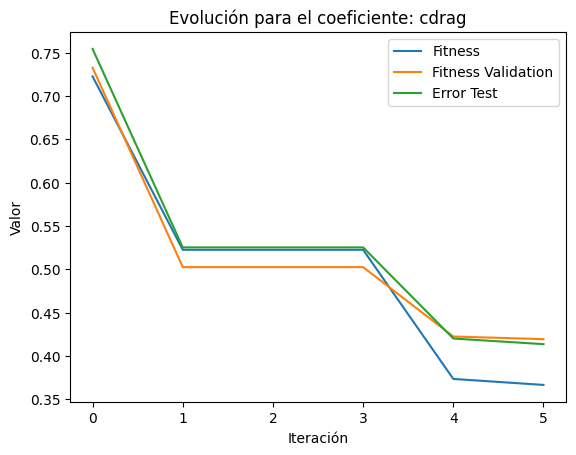

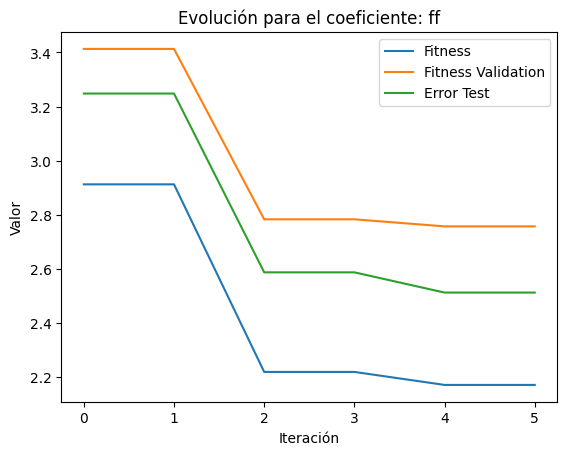

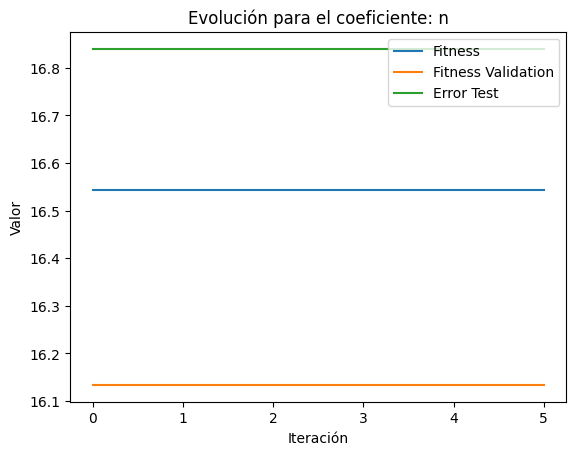

In [31]:
for coef in coeficientes:
    # Preparar listas para almacenar los valores de cada iteración
    fitness_values = []
    fitness_val_values = []
    error_test_values = []

    for i in range(iteraciones):
        # Convertir el string a diccionario
        other_info_dict = ast.literal_eval(original_results[f'{coef}'][f'{i}'].other_info)

        # Añadir los valores de fitness, fitness validation y error test a las listas
        fitness_values.append(original_results[f'{coef}'][f'{i}'].fitness)
        fitness_val_values.append(original_results[f'{coef}'][f'{i}'].fitness_validation)
        error_test_values.append(other_info_dict['errortest'])

    # Crear un gráfico para este coeficiente
    plt.figure()
    plt.plot(fitness_values, label='Fitness')
    plt.plot(fitness_val_values, label='Fitness Validation')
    plt.plot(error_test_values, label='Error Test')
    plt.legend()
    plt.title(f'Evolución para el coeficiente: {coef}')
    plt.xlabel('Iteración')
    plt.ylabel('Valor')
    plt.show()


## mejores individuos

In [37]:
# Muestra los mejores individuos de la ultima iteración para cada coeficiente
for coef in coeficientes:
    print(f'Coeficiente: {coef}')
    print(original_results[f'{coef}'][f'{iteraciones-1}'].phenotype)
    print(original_results[f'{coef}'][f'{iteraciones-1}'].original_phenotype)
    print(original_results[f'{coef}'][f'{iteraciones-1}'].other_info)
    print('-------------------')


Coeficiente: cdrag
(((x[0]*0.7584424063240567+x[0]+x[1])**0.4565224341462174)**0.1463152370334997)
(((x[0]*Constant+x[0]+x[1])**Constant)**Constant)
{'errortest': 0.4135239457156484}
-------------------
Coeficiente: ff
(x[0]+(0.42112349064365984/x[0])+0.7009335647647842/x[0]+(0.5291550863189122/x[0]**0.7211249074104583)+(x[0]/x[1])/(x[1]*x[1]))
(x[0]+(Constant/x[0])+Constant/x[0]+(Constant/x[0]**Constant)+(x[0]/x[1])/(x[1]*x[1]))
{'errortest': 2.5128989125517993}
-------------------
Coeficiente: n
(((x[0]+x[0])/0.49205143325806766*0.3544989408948883)**0.08054636927325665) * (x[1]**0.5135999667923177) * (x[2])
(((x[0]+x[0])/Constant*Constant)**Constant) * (x[1]**Constant) * (x[2])
{'errortest': 16.83980174610821}
-------------------


## Calculo de errores

In [47]:
# Cargar los datos de los archivos proporcionados
df_n = pd.read_csv('resources/LIB/CI/df_n_53.txt', sep=',')
df_ff = pd.read_csv('resources/LIB/CI/df_ff_53.txt', sep=',')
df_cdrag = pd.read_csv('resources/LIB/CI/df_cdrag_53.txt', sep=',')

# Definir las ecuaciones como funciones de Python
def cdrag_eq(x):
    return (((x[0]*0.7584424063240567 + x[0] + x[1])**0.4565224341462174)**0.1463152370334997)

def ff_eq(x):
    return (x[0] + (0.42112349064365984 / x[0]) + 0.7009335647647842 / x[0] +
            (0.5291550863189122 / x[0]**0.7211249074104583) + (x[0] / x[1]) / (x[1] * x[1]))

def n_eq(x):
    return (((x[0] + x[0]) / 0.49205143325806766 * 0.3544989408948883)**0.08054636927325665) * (x[1]**0.5135999667923177) * x[2]

# Funciones para calcular MAE y MAPE
def mae(real, pred):
    return np.mean(np.abs(real - pred))

def mape(real, pred):
    # Evitar dividir por cero
    real = np.where(real == 0, np.finfo(float).eps, real)
    return np.mean(np.abs((real - pred) / real)) * 100

# Calcular predicciones y errores para cada coeficiente
errors = {}

# Coeficiente cdrag
cdrag_predictions = df_cdrag.apply(lambda row: cdrag_eq([row['K'], row['Rem']]), axis=1)
errors['cdrag'] = {
    'MAE': mae(df_cdrag['cdrag'], cdrag_predictions),
    'MAPE': mape(df_cdrag['cdrag'], cdrag_predictions)
}

# Coeficiente ff
ff_predictions = df_ff.apply(lambda row: ff_eq([row['K'], row['Rem']]), axis=1)
errors['ff'] = {
    'MAE': mae(df_ff['frictionFactor'], ff_predictions),
    'MAPE': mape(df_ff['frictionFactor'], ff_predictions)
}

# Coeficiente n
n_predictions = df_n.apply(lambda row: n_eq([row['K'], row['Rem'], row['prandtl']]), axis=1)
errors['n'] = {
    'MAE': mae(df_n['nusselt'], n_predictions),
    'MAPE': mape(df_n['nusselt'], n_predictions)
}

# Mostrar los errores calculados para cada coeficiente
for coef, err in errors.items():
    print(f'Coeficiente: {coef}')
    print(f'MAE: {err["MAE"]:.4f}')
    print(f'MAPE: {err["MAPE"]:.4f}\n')

Coeficiente: cdrag
MAE: 0.3006
MAPE: 14.3605

Coeficiente: ff
MAE: 1.4445
MAPE: 23.4950

Coeficiente: n
MAE: 13.6369
MAPE: 21.0419

